In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

In [17]:

df = pd.read_excel('data_set_10-09-2023.xlsx', engine='openpyxl')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Fase atual                                      2577 non-null   object        
 1   Etiquetas                                       2577 non-null   object        
 2   Empreendimento                                  2577 non-null   object        
 3   Modulo do Sistema                               2577 non-null   object        
 4   Tipo de Chamado                                 2577 non-null   object        
 5   Primeira vez que entrou na fase Inicio          2577 non-null   datetime64[ns]
 6   Última vez que saiu da fase Inicio              2576 non-null   datetime64[ns]
 7   Primeira vez que entrou na fase Em atendimento  2393 non-null   datetime64[ns]
 8   Última vez que saiu da fase Em atendimento      

In [19]:
df["Primeira vez que entrou na fase Inicio"].head()

0   2023-01-02 11:17:31.668
1   2023-01-02 11:35:34.256
2   2023-01-02 11:36:02.568
3   2023-01-02 13:03:06.932
4   2023-01-02 13:29:19.637
Name: Primeira vez que entrou na fase Inicio, dtype: datetime64[ns]

In [20]:
df.rename(columns={'Primeira vez que entrou na fase Inicio': 'start_inicio',
                   'Última vez que saiu da fase Inicio': 'end_inicio',
                   'Primeira vez que entrou na fase Em atendimento':'start_atendimento',
                   'Última vez que saiu da fase Em atendimento':'end_atendimento'}, inplace = True)

In [21]:
df.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:31.668,2023-01-02 11:54:42.790,NaT,NaT,Joice Moraes,619791131
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34.256,2023-01-02 11:55:10.949,2023-01-02 11:55:10.971,2023-01-02 11:56:29.075,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:02.568,2023-01-02 11:56:48.253,2023-01-02 11:56:48.265,2023-01-02 11:58:43.027,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:06.932,2023-01-02 19:07:16.786,2023-01-02 19:07:16.801,2023-03-30 11:02:09.634,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:19.637,2023-01-02 17:24:47.336,2023-01-02 17:24:47.358,2023-01-02 17:26:52.021,Tiago Amaral,619857549


In [22]:
df["start_inicio"] = df["start_inicio"].dt.round("S")

In [23]:
df.sort_values(['Fase atual'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:32,2023-01-02 11:54:42.790,NaT,NaT,Joice Moraes,619791131
1714,Concluído,Média,Nutra Fit Moema,Vendas,Solicitacao,2023-06-08 19:25:38,2023-06-08 20:21:43.567,2023-06-08 20:21:43.584,2023-06-08 20:22:09.942,Tiago Amaral,725192790
1715,Concluído,Média,Nutra Fit Conjunto Nacional,PDV / Pedidos,Solicitacao,2023-06-08 19:31:42,2023-06-08 20:23:14.053,2023-06-08 20:23:14.064,2023-06-08 20:23:20.320,Lucas Guedes,725194345
1716,Concluído,Crítica,Todos Empreendimentos,Dashboard,Solicitacao,2023-06-08 21:44:07,2023-06-08 21:48:54.550,2023-06-08 21:48:54.563,2023-06-08 21:51:55.235,TESTE,725223162
1717,Concluído,Baixa,CR Nutrition,Dashboard,Solicitacao,2023-06-08 21:53:33,2023-06-08 22:02:17.626,2023-06-08 22:02:17.640,2023-06-08 22:02:21.339,TESTE,725225028
...,...,...,...,...,...,...,...,...,...,...,...
594,Direcionado para 2o nivel,Crítica,CR Nutriton,PDV / Pedidos,"Problema, Solicitacao",2023-02-24 11:20:44,2023-02-27 09:41:16.632,NaT,NaT,JEISON MAGALHÃES,650632319
2146,Direcionado para 2o nivel,Alta,Todos Empreendimentos,Estoque - Baixa Manual (Saída),Solicitacao,2023-07-26 18:17:50,2023-07-27 14:27:00.309,2023-07-27 14:27:00.324,2023-07-28 08:08:55.192,Jéssica,753213909
1432,Direcionado para 2o nivel,Alta,Todos Empreendimentos,Relatorio,Solicitacao,2023-05-17 12:32:51,2023-05-17 12:34:13.618,NaT,NaT,SUPORTE NIVEL 1,706961318
1413,Direcionado para 2o nivel,Alta,Todos Empreendimentos,Fiscal,Problema,2023-05-15 10:25:33,2023-05-15 10:26:55.012,NaT,NaT,SUPORTE NIVEL 1,703745624


In [24]:
df.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:32,2023-01-02 11:54:42.790,NaT,NaT,Joice Moraes,619791131
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:10.949,2023-01-02 11:55:10.971,2023-01-02 11:56:29.075,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48.253,2023-01-02 11:56:48.265,2023-01-02 11:58:43.027,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:16.786,2023-01-02 19:07:16.801,2023-03-30 11:02:09.634,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47.336,2023-01-02 17:24:47.358,2023-01-02 17:26:52.021,Tiago Amaral,619857549


In [25]:
df["end_inicio"] = df["end_inicio"].dt.round("S")

In [26]:
df["start_atendimento"] = df["start_atendimento"].dt.round("S")
df["end_atendimento"] = df["end_atendimento"].dt.round("S")

In [27]:
df.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:32,2023-01-02 11:54:43,NaT,NaT,Joice Moraes,619791131
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fase atual           2577 non-null   object        
 1   Etiquetas            2577 non-null   object        
 2   Empreendimento       2577 non-null   object        
 3   Modulo do Sistema    2577 non-null   object        
 4   Tipo de Chamado      2577 non-null   object        
 5   start_inicio         2577 non-null   datetime64[ns]
 6   end_inicio           2576 non-null   datetime64[ns]
 7   start_atendimento    2393 non-null   datetime64[ns]
 8   end_atendimento      2393 non-null   datetime64[ns]
 9   Nome do solicitante  2577 non-null   object        
 10  Código               2577 non-null   int64         
dtypes: datetime64[ns](4), int64(1), object(6)
memory usage: 221.6+ KB


In [29]:
df1 = df.dropna()

In [30]:
df1.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549
5,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478


In [31]:
df2 = df1[df1["Fase atual"].str.contains("Concluído|Em atendimento|Inicio") == True]

In [32]:
df2.sort_values(['Fase atual'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
1764,Concluído,Crítica,Nutra Fit Cidade Sao Paulo,Estoque - Reposicao de Lojas,Solicitacao,2023-06-13 16:01:20,2023-06-13 16:28:17,2023-06-13 16:28:17,2023-06-13 16:28:41,Lucas Guedes,727384356
1765,Concluído,Alta,CELLGENIX OFICIAL,Vendas,Problema,2023-06-13 16:12:37,2023-06-13 16:31:40,2023-06-13 16:31:41,2023-06-13 16:31:49,YGOR,727393551
1766,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-06-13 16:27:14,2023-06-13 16:28:15,2023-06-13 16:28:15,2023-06-13 16:30:30,Celeste,727403617
1767,Concluído,Alta,Nutra Fit Alphavile,Vendas,Solicitacao,2023-06-13 21:55:52,2023-06-14 10:53:38,2023-06-14 10:53:38,2023-06-14 10:56:29,Marcos Vinicius,727536562
...,...,...,...,...,...,...,...,...,...,...,...
937,Concluído,Média,Nutra Fit Market Place,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 15:25:45,2023-03-29 16:05:40,2023-03-29 16:05:40,2023-03-29 16:06:30,Tiago Amaral,666320121
938,Concluído,Média,Nutra Fit Morumbi Town,Vendas,Solicitacao,2023-03-29 17:17:58,2023-03-30 07:40:49,2023-03-30 07:40:49,2023-03-30 07:42:21,Tiago Amaral,666390531
941,Concluído,Alta,MKTP - 02,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 17:31:31,2023-03-30 07:45:44,2023-03-30 07:45:44,2023-03-30 07:46:43,SARA,666398945
943,Concluído,Urgente,HOT FIT CENTER 3,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 17:41:29,2023-03-30 07:49:31,2023-03-30 07:49:31,2023-03-30 07:50:18,jamil Chahoud,666404825


In [33]:
df2["tempo_inicio"] = df2["end_inicio"] - df2["start_inicio"]

C:\Users\bruno\AppData\Local\Temp\ipykernel_11600\4273797739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tempo_inicio"] = df2["end_inicio"] - df2["start_inicio"]


In [34]:
df2.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27
5,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00


In [35]:
df2["tempo_atendimento"] = df2["end_atendimento"] - df2["start_atendimento"]

C:\Users\bruno\AppData\Local\Temp\ipykernel_11600\2344192344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tempo_atendimento"] = df2["end_atendimento"] - df2["start_atendimento"]


In [36]:
df2.head(20)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05
5,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15
7,Concluído,Alta,Nutra Fit Patio Paulista,Vendas,Solicitacao,2023-01-02 17:59:05,2023-01-02 19:26:37,2023-01-02 19:26:37,2023-01-02 19:26:50,Jamil Chahoud,619987550,0 days 01:27:32,0 days 00:00:13
8,Concluído,Alta,Nutra Fit Jardim Sul,Estoque - Inventário,Solicitacao,2023-01-02 19:52:50,2023-01-03 09:39:34,2023-01-03 09:39:34,2023-01-03 09:43:28,Samy Ghassan Taha,620025695,0 days 13:46:44,0 days 00:03:54
9,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 20:16:12,2023-01-03 09:45:38,2023-01-03 09:45:38,2023-01-03 09:48:55,Artur Carlos Do Nascimento,620030831,0 days 13:29:26,0 days 00:03:17
10,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 21:35:19,2023-01-03 09:49:16,2023-01-03 09:49:16,2023-01-03 09:50:32,Artur Carlos Do Nascimento,620049818,0 days 12:13:57,0 days 00:01:16
11,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-03 09:35:34,2023-01-03 09:57:47,2023-01-03 09:57:47,2023-01-03 09:57:59,Leticia Silva,620220944,0 days 00:22:13,0 days 00:00:12


In [37]:
df2['tempo_atendimento'].mean()

Timedelta('0 days 01:49:04.714345462')

In [38]:
df2.sort_values(['tempo_inicio'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento
550,Concluído,Média,CR Nutriton,PDV / Pedidos,Solicitacao,2023-02-17 16:10:57,2023-02-17 16:11:03,2023-02-17 16:11:03,2023-02-17 16:11:10,SARA,648242917,0 days 00:00:06,0 days 00:00:07
2516,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-09-04 12:16:25,2023-09-04 12:16:33,2023-09-04 12:16:33,2023-09-04 12:18:23,Celeste,787339387,0 days 00:00:08,0 days 00:01:50
846,Concluído,Urgente,CR Nutrition,Importacao de Vendas,Solicitacao,2023-03-20 12:45:29,2023-03-20 12:45:41,2023-03-20 12:45:41,2023-03-20 13:04:35,Celeste,661363348,0 days 00:00:12,0 days 00:18:54
522,Concluído,Urgente,Nutra Fit Frei Caneca,Estoque - Reposicao de Lojas,Solicitacao,2023-02-16 13:22:50,2023-02-16 13:23:06,2023-02-16 13:23:06,2023-02-16 13:37:19,JAMIL Chahoud,647617657,0 days 00:00:16,0 days 00:14:13
2455,Concluído,Urgente,Nutra Fit Mazzei,Estoque - Entrada de produtos,Solicitacao,2023-08-29 11:43:16,2023-08-29 11:43:32,2023-08-29 11:43:32,2023-08-29 11:45:42,vinicius costa,783870221,0 days 00:00:16,0 days 00:02:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Concluído,Alta,MKTP - 02,Separacao/Conferencia,Solicitacao,2023-03-31 16:03:44,2023-04-03 08:25:38,2023-04-03 08:25:38,2023-04-03 08:47:50,Rogério,667344462,2 days 16:21:54,0 days 00:22:12
2378,Concluído,Alta,CR Nutrition,PDV / Pedidos,Solicitacao,2023-08-18 14:58:04,2023-08-21 09:13:58,2023-08-21 09:13:58,2023-08-21 13:06:14,JEISON MAGALHÃES,777949208,2 days 18:15:54,0 days 03:52:16
2377,Concluído,Alta,CR Nutrition,Perfil de Usuario,Solicitacao,2023-08-18 14:21:13,2023-08-21 08:44:55,2023-08-21 08:44:55,2023-08-21 13:06:13,JEISON MAGALHÃES,777913595,2 days 18:23:42,0 days 04:21:18
1698,Concluído,Urgente,Todos Empreendimentos,Relatorio,Solicitacao,2023-06-07 15:01:02,2023-06-13 09:46:32,2023-06-13 09:46:32,2023-06-14 11:40:14,Vania Barboza,724642378,5 days 18:45:30,1 days 01:53:42


In [39]:
df2['tempo_atendimento'].max()

Timedelta('86 days 15:54:53')

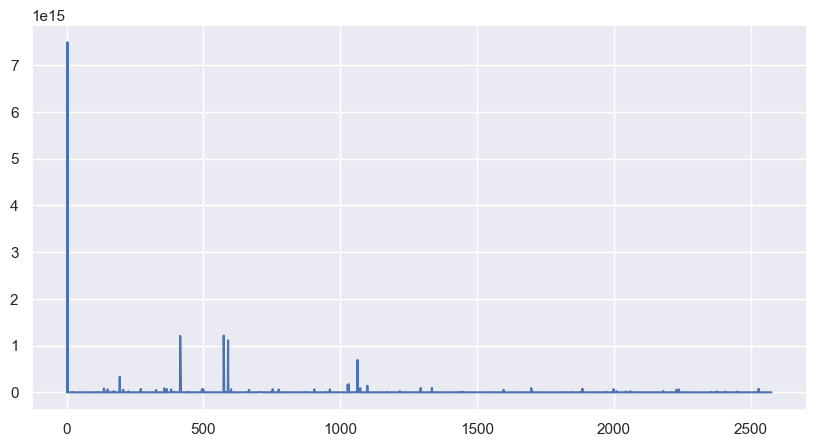

In [40]:
plt.plot(df2['tempo_atendimento'])

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2391 entries, 1 to 2576
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Fase atual           2391 non-null   object         
 1   Etiquetas            2391 non-null   object         
 2   Empreendimento       2391 non-null   object         
 3   Modulo do Sistema    2391 non-null   object         
 4   Tipo de Chamado      2391 non-null   object         
 5   start_inicio         2391 non-null   datetime64[ns] 
 6   end_inicio           2391 non-null   datetime64[ns] 
 7   start_atendimento    2391 non-null   datetime64[ns] 
 8   end_atendimento      2391 non-null   datetime64[ns] 
 9   Nome do solicitante  2391 non-null   object         
 10  Código               2391 non-null   int64          
 11  tempo_inicio         2391 non-null   timedelta64[ns]
 12  tempo_atendimento    2391 non-null   timedelta64[ns]
dtypes: datetime64[ns](

In [42]:
df2.reset_index(drop=True, inplace=True)

In [43]:
df2.sort_values(['Fase atual'],ascending = False)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento
0,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18
1589,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-06-13 15:49:08,2023-06-13 16:14:48,2023-06-13 16:14:48,2023-06-13 16:15:12,anderson,727373007,0 days 00:25:40,0 days 00:00:24
1591,Concluído,Alta,CELLGENIX OFICIAL,Vendas,Problema,2023-06-13 16:12:37,2023-06-13 16:31:40,2023-06-13 16:31:41,2023-06-13 16:31:49,YGOR,727393551,0 days 00:19:03,0 days 00:00:08
1592,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-06-13 16:27:14,2023-06-13 16:28:15,2023-06-13 16:28:15,2023-06-13 16:30:30,Celeste,727403617,0 days 00:01:01,0 days 00:02:15
1593,Concluído,Alta,Nutra Fit Alphavile,Vendas,Solicitacao,2023-06-13 21:55:52,2023-06-14 10:53:38,2023-06-14 10:53:38,2023-06-14 10:56:29,Marcos Vinicius,727536562,0 days 12:57:46,0 days 00:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Concluído,Média,Nutra Fit Market Place,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 15:25:45,2023-03-29 16:05:40,2023-03-29 16:05:40,2023-03-29 16:06:30,Tiago Amaral,666320121,0 days 00:39:55,0 days 00:00:50
798,Concluído,Média,Nutra Fit Morumbi Town,Vendas,Solicitacao,2023-03-29 17:17:58,2023-03-30 07:40:49,2023-03-30 07:40:49,2023-03-30 07:42:21,Tiago Amaral,666390531,0 days 14:22:51,0 days 00:01:32
799,Concluído,Alta,MKTP - 02,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 17:31:31,2023-03-30 07:45:44,2023-03-30 07:45:44,2023-03-30 07:46:43,SARA,666398945,0 days 14:14:13,0 days 00:00:59
800,Concluído,Urgente,Nutra Fit Center 3,Estoque - Reposicao de Lojas,Solicitacao,2023-03-29 17:35:36,2023-03-30 07:47:10,2023-03-30 07:47:10,2023-03-30 07:48:07,jamil Chahoud,666401310,0 days 14:11:34,0 days 00:00:57


In [44]:
list_atendimento = []
list_inicio = []
for i in range(len(df2.index)):
    s = df2['tempo_atendimento'][i].total_seconds()
    s2 = df2['tempo_inicio'][i].total_seconds()
    hours = s // 3600
    hours2 = s2 // 3600 
    s = s - (hours * 3600)
    s2 = s2 - (hours2 * 3600)
    minutes = s // 60
    minutes2 = s2 // 60
    seconds = s - (minutes * 60)
    seconds2 = s2 - (minutes2 * 60)
    list_atendimento.append(('{:02}:{:02}:{:02}'.format(int(hours), int(minutes), int(seconds))))
    list_inicio.append(('{:02}:{:02}:{:02}'.format(int(hours2), int(minutes2), int(seconds2))))

df2['tempo_atendimento_continuo'] = list_atendimento
df2['tempo_inicio_continuo'] = list_inicio

C:\Users\bruno\AppData\Local\Temp\ipykernel_11600\4163477250.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tempo_atendimento_continuo'] = list_atendimento
C:\Users\bruno\AppData\Local\Temp\ipykernel_11600\4163477250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tempo_inicio_continuo'] = list_inicio


In [45]:
df2['tempo_inicio'].max()

Timedelta('15 days 17:52:53')

In [46]:
df2.sort_values(['Fase atual'],ascending = False)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18,00:01:18,00:19:37
1589,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-06-13 15:49:08,2023-06-13 16:14:48,2023-06-13 16:14:48,2023-06-13 16:15:12,anderson,727373007,0 days 00:25:40,0 days 00:00:24,00:00:24,00:25:40
1591,Concluído,Alta,CELLGENIX OFICIAL,Vendas,Problema,2023-06-13 16:12:37,2023-06-13 16:31:40,2023-06-13 16:31:41,2023-06-13 16:31:49,YGOR,727393551,0 days 00:19:03,0 days 00:00:08,00:00:08,00:19:03
1592,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-06-13 16:27:14,2023-06-13 16:28:15,2023-06-13 16:28:15,2023-06-13 16:30:30,Celeste,727403617,0 days 00:01:01,0 days 00:02:15,00:02:15,00:01:01
1593,Concluído,Alta,Nutra Fit Alphavile,Vendas,Solicitacao,2023-06-13 21:55:52,2023-06-14 10:53:38,2023-06-14 10:53:38,2023-06-14 10:56:29,Marcos Vinicius,727536562,0 days 12:57:46,0 days 00:02:51,00:02:51,12:57:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Concluído,Média,Nutra Fit Market Place,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 15:25:45,2023-03-29 16:05:40,2023-03-29 16:05:40,2023-03-29 16:06:30,Tiago Amaral,666320121,0 days 00:39:55,0 days 00:00:50,00:00:50,00:39:55
798,Concluído,Média,Nutra Fit Morumbi Town,Vendas,Solicitacao,2023-03-29 17:17:58,2023-03-30 07:40:49,2023-03-30 07:40:49,2023-03-30 07:42:21,Tiago Amaral,666390531,0 days 14:22:51,0 days 00:01:32,00:01:32,14:22:51
799,Concluído,Alta,MKTP - 02,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 17:31:31,2023-03-30 07:45:44,2023-03-30 07:45:44,2023-03-30 07:46:43,SARA,666398945,0 days 14:14:13,0 days 00:00:59,00:00:59,14:14:13
800,Concluído,Urgente,Nutra Fit Center 3,Estoque - Reposicao de Lojas,Solicitacao,2023-03-29 17:35:36,2023-03-30 07:47:10,2023-03-30 07:47:10,2023-03-30 07:48:07,jamil Chahoud,666401310,0 days 14:11:34,0 days 00:00:57,00:00:57,14:11:34


In [47]:
df1.sort_values(['Fase atual'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
1764,Concluído,Crítica,Nutra Fit Cidade Sao Paulo,Estoque - Reposicao de Lojas,Solicitacao,2023-06-13 16:01:20,2023-06-13 16:28:17,2023-06-13 16:28:17,2023-06-13 16:28:41,Lucas Guedes,727384356
1765,Concluído,Alta,CELLGENIX OFICIAL,Vendas,Problema,2023-06-13 16:12:37,2023-06-13 16:31:40,2023-06-13 16:31:41,2023-06-13 16:31:49,YGOR,727393551
1766,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-06-13 16:27:14,2023-06-13 16:28:15,2023-06-13 16:28:15,2023-06-13 16:30:30,Celeste,727403617
1767,Concluído,Alta,Nutra Fit Alphavile,Vendas,Solicitacao,2023-06-13 21:55:52,2023-06-14 10:53:38,2023-06-14 10:53:38,2023-06-14 10:56:29,Marcos Vinicius,727536562
...,...,...,...,...,...,...,...,...,...,...,...
937,Concluído,Média,Nutra Fit Market Place,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 15:25:45,2023-03-29 16:05:40,2023-03-29 16:05:40,2023-03-29 16:06:30,Tiago Amaral,666320121
938,Concluído,Média,Nutra Fit Morumbi Town,Vendas,Solicitacao,2023-03-29 17:17:58,2023-03-30 07:40:49,2023-03-30 07:40:49,2023-03-30 07:42:21,Tiago Amaral,666390531
941,Concluído,Alta,MKTP - 02,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 17:31:31,2023-03-30 07:45:44,2023-03-30 07:45:44,2023-03-30 07:46:43,SARA,666398945
2146,Direcionado para 2o nivel,Alta,Todos Empreendimentos,Estoque - Baixa Manual (Saída),Solicitacao,2023-07-26 18:17:50,2023-07-27 14:27:00,2023-07-27 14:27:00,2023-07-28 08:08:55,Jéssica,753213909


In [48]:
df2.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18,00:01:18,00:19:37
1,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55,00:01:55,00:20:45
2,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53,2079:54:53,06:04:10
3,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05,00:02:05,03:55:27
4,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15,00:00:15,05:20:00


In [49]:
df3 = df2.sort_values(['start_inicio'],ascending = False)

In [50]:
df3

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
2390,Concluído,Urgente,Nutra Fit Higienopolis,Vendas,Solicitacao,2023-09-09 15:22:20,2023-09-09 15:24:44,2023-09-09 15:24:44,2023-09-09 15:25:43,HELIO RAMOS,790120768,0 days 00:02:24,0 days 00:00:59,00:00:59,00:02:24
2389,Concluído,Urgente,Nutra Fit Mooca,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:25:59,2023-09-09 14:14:30,2023-09-09 14:14:30,2023-09-09 14:14:39,Wellington Esteves,790089041,0 days 00:48:31,0 days 00:00:09,00:00:09,00:48:31
2388,Concluído,Urgente,Nutra Fit Grand Plaza,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:20:45,2023-09-09 13:25:24,2023-09-09 13:25:24,2023-09-09 13:26:44,Wellington Esteves,790087505,0 days 00:04:39,0 days 00:01:20,00:01:20,00:04:39
2387,Concluído,Urgente,Nutra Fit Eldorado,Estoque - Reposicao de Lojas,Solicitacao,2023-09-09 02:11:46,2023-09-09 09:55:25,2023-09-09 09:55:25,2023-09-09 09:59:35,Artur Carlos Do Nascimento,789906466,0 days 07:43:39,0 days 00:04:10,00:04:10,07:43:39
2386,Concluído,Alta,Nutra Fit Frei Caneca,Estoque - Inventário,Solicitacao,2023-09-08 20:51:17,2023-09-09 10:23:51,2023-09-09 10:23:51,2023-09-09 10:28:43,Lucas Guedes,789826158,0 days 13:32:34,0 days 00:04:52,00:04:52,13:32:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15,00:00:15,05:20:00
3,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05,00:02:05,03:55:27
2,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53,2079:54:53,06:04:10
1,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55,00:01:55,00:20:45


In [51]:
df3.reset_index(drop=True, inplace=True)

In [52]:
df3

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,Concluído,Urgente,Nutra Fit Higienopolis,Vendas,Solicitacao,2023-09-09 15:22:20,2023-09-09 15:24:44,2023-09-09 15:24:44,2023-09-09 15:25:43,HELIO RAMOS,790120768,0 days 00:02:24,0 days 00:00:59,00:00:59,00:02:24
1,Concluído,Urgente,Nutra Fit Mooca,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:25:59,2023-09-09 14:14:30,2023-09-09 14:14:30,2023-09-09 14:14:39,Wellington Esteves,790089041,0 days 00:48:31,0 days 00:00:09,00:00:09,00:48:31
2,Concluído,Urgente,Nutra Fit Grand Plaza,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:20:45,2023-09-09 13:25:24,2023-09-09 13:25:24,2023-09-09 13:26:44,Wellington Esteves,790087505,0 days 00:04:39,0 days 00:01:20,00:01:20,00:04:39
3,Concluído,Urgente,Nutra Fit Eldorado,Estoque - Reposicao de Lojas,Solicitacao,2023-09-09 02:11:46,2023-09-09 09:55:25,2023-09-09 09:55:25,2023-09-09 09:59:35,Artur Carlos Do Nascimento,789906466,0 days 07:43:39,0 days 00:04:10,00:04:10,07:43:39
4,Concluído,Alta,Nutra Fit Frei Caneca,Estoque - Inventário,Solicitacao,2023-09-08 20:51:17,2023-09-09 10:23:51,2023-09-09 10:23:51,2023-09-09 10:28:43,Lucas Guedes,789826158,0 days 13:32:34,0 days 00:04:52,00:04:52,13:32:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15,00:00:15,05:20:00
2387,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05,00:02:05,03:55:27
2388,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53,2079:54:53,06:04:10
2389,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55,00:01:55,00:20:45


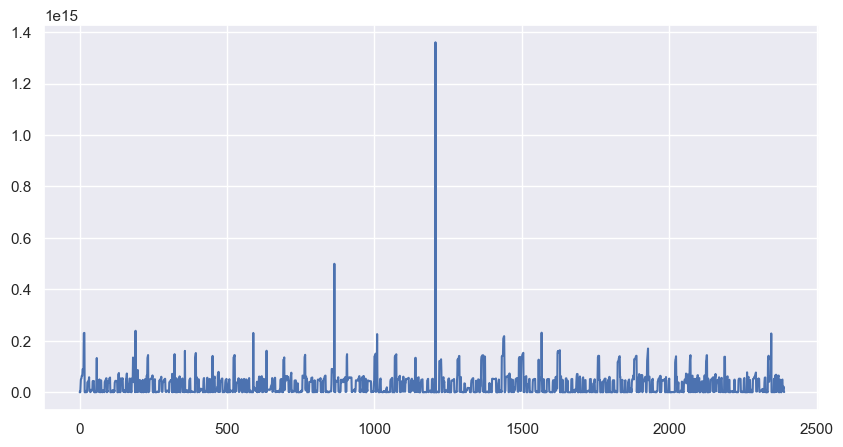

In [53]:
plt.plot(df3['tempo_inicio'])

<Axes: >

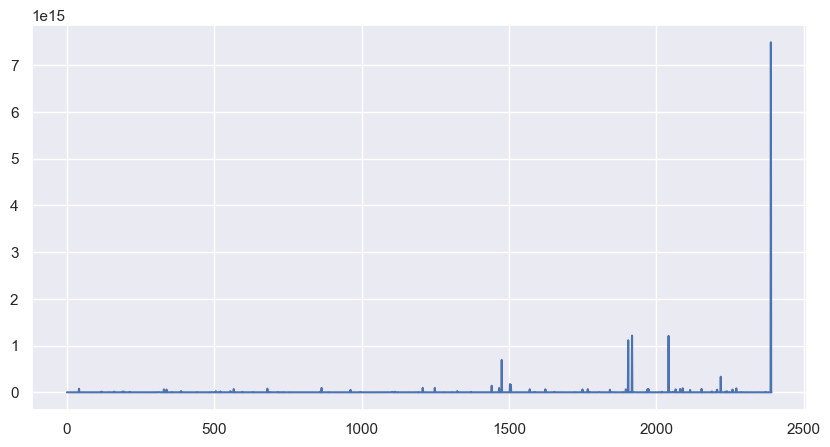

In [54]:
df3['tempo_atendimento'].plot()

In [55]:
df3["Empreendimento - Solicitante"] =  df3["Nome do solicitante"] + " - " + df3['Empreendimento']

In [56]:
df3.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo,Empreendimento - Solicitante
0,Concluído,Urgente,Nutra Fit Higienopolis,Vendas,Solicitacao,2023-09-09 15:22:20,2023-09-09 15:24:44,2023-09-09 15:24:44,2023-09-09 15:25:43,HELIO RAMOS,790120768,0 days 00:02:24,0 days 00:00:59,00:00:59,00:02:24,HELIO RAMOS - Nutra Fit Higienopolis
1,Concluído,Urgente,Nutra Fit Mooca,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:25:59,2023-09-09 14:14:30,2023-09-09 14:14:30,2023-09-09 14:14:39,Wellington Esteves,790089041,0 days 00:48:31,0 days 00:00:09,00:00:09,00:48:31,Wellington Esteves - Nutra Fit Mooca
2,Concluído,Urgente,Nutra Fit Grand Plaza,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:20:45,2023-09-09 13:25:24,2023-09-09 13:25:24,2023-09-09 13:26:44,Wellington Esteves,790087505,0 days 00:04:39,0 days 00:01:20,00:01:20,00:04:39,Wellington Esteves - Nutra Fit Grand Plaza
3,Concluído,Urgente,Nutra Fit Eldorado,Estoque - Reposicao de Lojas,Solicitacao,2023-09-09 02:11:46,2023-09-09 09:55:25,2023-09-09 09:55:25,2023-09-09 09:59:35,Artur Carlos Do Nascimento,789906466,0 days 07:43:39,0 days 00:04:10,00:04:10,07:43:39,Artur Carlos Do Nascimento - Nutra Fit Eldorado
4,Concluído,Alta,Nutra Fit Frei Caneca,Estoque - Inventário,Solicitacao,2023-09-08 20:51:17,2023-09-09 10:23:51,2023-09-09 10:23:51,2023-09-09 10:28:43,Lucas Guedes,789826158,0 days 13:32:34,0 days 00:04:52,00:04:52,13:32:34,Lucas Guedes - Nutra Fit Frei Caneca


In [57]:
df3.sort_values(['Fase atual'],ascending = False)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo,Empreendimento - Solicitante
0,Concluído,Urgente,Nutra Fit Higienopolis,Vendas,Solicitacao,2023-09-09 15:22:20,2023-09-09 15:24:44,2023-09-09 15:24:44,2023-09-09 15:25:43,HELIO RAMOS,790120768,0 days 00:02:24,0 days 00:00:59,00:00:59,00:02:24,HELIO RAMOS - Nutra Fit Higienopolis
1589,Concluído,Urgente,HOT FIT CENTER 3,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 17:41:29,2023-03-30 07:49:31,2023-03-30 07:49:31,2023-03-30 07:50:18,jamil Chahoud,666404825,0 days 14:08:02,0 days 00:00:47,00:00:47,14:08:02,jamil Chahoud - HOT FIT CENTER 3
1591,Concluído,Alta,MKTP - 02,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 17:31:31,2023-03-30 07:45:44,2023-03-30 07:45:44,2023-03-30 07:46:43,SARA,666398945,0 days 14:14:13,0 days 00:00:59,00:00:59,14:14:13,SARA - MKTP - 02
1592,Concluído,Média,Nutra Fit Morumbi Town,Vendas,Solicitacao,2023-03-29 17:17:58,2023-03-30 07:40:49,2023-03-30 07:40:49,2023-03-30 07:42:21,Tiago Amaral,666390531,0 days 14:22:51,0 days 00:01:32,00:01:32,14:22:51,Tiago Amaral - Nutra Fit Morumbi Town
1593,Concluído,Média,Nutra Fit Market Place,Estoque - Baixa Manual (Saída),Solicitacao,2023-03-29 15:25:45,2023-03-29 16:05:40,2023-03-29 16:05:40,2023-03-29 16:06:30,Tiago Amaral,666320121,0 days 00:39:55,0 days 00:00:50,00:00:50,00:39:55,Tiago Amaral - Nutra Fit Market Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Concluído,Alta,Nutra Fit Alphavile,Vendas,Solicitacao,2023-06-13 21:55:52,2023-06-14 10:53:38,2023-06-14 10:53:38,2023-06-14 10:56:29,Marcos Vinicius,727536562,0 days 12:57:46,0 days 00:02:51,00:02:51,12:57:46,Marcos Vinicius - Nutra Fit Alphavile
798,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-06-13 16:27:14,2023-06-13 16:28:15,2023-06-13 16:28:15,2023-06-13 16:30:30,Celeste,727403617,0 days 00:01:01,0 days 00:02:15,00:02:15,00:01:01,Celeste - CR Nutrition
799,Concluído,Alta,CELLGENIX OFICIAL,Vendas,Problema,2023-06-13 16:12:37,2023-06-13 16:31:40,2023-06-13 16:31:41,2023-06-13 16:31:49,YGOR,727393551,0 days 00:19:03,0 days 00:00:08,00:00:08,00:19:03,YGOR - CELLGENIX OFICIAL
800,Concluído,Crítica,Nutra Fit Cidade Sao Paulo,Estoque - Reposicao de Lojas,Solicitacao,2023-06-13 16:01:20,2023-06-13 16:28:17,2023-06-13 16:28:17,2023-06-13 16:28:41,Lucas Guedes,727384356,0 days 00:26:57,0 days 00:00:24,00:00:24,00:26:57,Lucas Guedes - Nutra Fit Cidade Sao Paulo


In [58]:
df4 = df3[df3.columns[[10,15,0,1,2,3,4,5,6,7,8,9,11,12,13,14]]]

In [59]:
df4 = df4[df4.columns[[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15]]]

In [60]:
df4.head()

,Código,Empreendimento - Solicitante,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,790120768,HELIO RAMOS - Nutra Fit Higienopolis,Concluído,Urgente,Nutra Fit Higienopolis,Vendas,Solicitacao,2023-09-09 15:22:20,2023-09-09 15:24:44,2023-09-09 15:24:44,2023-09-09 15:25:43,0 days 00:02:24,0 days 00:00:59,00:00:59,00:02:24
1,790089041,Wellington Esteves - Nutra Fit Mooca,Concluído,Urgente,Nutra Fit Mooca,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:25:59,2023-09-09 14:14:30,2023-09-09 14:14:30,2023-09-09 14:14:39,0 days 00:48:31,0 days 00:00:09,00:00:09,00:48:31
2,790087505,Wellington Esteves - Nutra Fit Grand Plaza,Concluído,Urgente,Nutra Fit Grand Plaza,Estoque - Baixa Manual (Saída),Solicitacao,2023-09-09 13:20:45,2023-09-09 13:25:24,2023-09-09 13:25:24,2023-09-09 13:26:44,0 days 00:04:39,0 days 00:01:20,00:01:20,00:04:39
3,789906466,Artur Carlos Do Nascimento - Nutra Fit Eldorado,Concluído,Urgente,Nutra Fit Eldorado,Estoque - Reposicao de Lojas,Solicitacao,2023-09-09 02:11:46,2023-09-09 09:55:25,2023-09-09 09:55:25,2023-09-09 09:59:35,0 days 07:43:39,0 days 00:04:10,00:04:10,07:43:39
4,789826158,Lucas Guedes - Nutra Fit Frei Caneca,Concluído,Alta,Nutra Fit Frei Caneca,Estoque - Inventário,Solicitacao,2023-09-08 20:51:17,2023-09-09 10:23:51,2023-09-09 10:23:51,2023-09-09 10:28:43,0 days 13:32:34,0 days 00:04:52,00:04:52,13:32:34


In [49]:
df4.to_csv('2023_09_10_BasePipefy.csv', index = False)